# Gauss &mdash; 13.05

## Dane wielowymiarowe

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import hiplot as hip
import gower
from pandas.plotting import parallel_coordinates, andrews_curves
from ChernoffFace import *
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
sns.set_style("whitegrid")

### Wykorzystywane dane

In [189]:
penguins = sns.load_dataset("penguins")
iris = sns.load_dataset("iris")
usa_arrests = load_usa_arrests_data_frame()

In [190]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [191]:
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [49]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [50]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [51]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [54]:
usa_arrests.head()

StateName  Murder  Assault  UrbanPopulation  Rape
0     Alabama    13.2      236               58  21.2
1      Alaska    10.0      263               48  44.5
2     Arizona     8.1      294               80  31.0
3    Arkansas     8.8      190               50  19.5
4  California     9.0      276               91  40.6

In [55]:
usa_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateName        50 non-null     object 
 1   Murder           50 non-null     float64
 2   Assault          50 non-null     int64  
 3   UrbanPopulation  50 non-null     int64  
 4   Rape             50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Zarys problemu

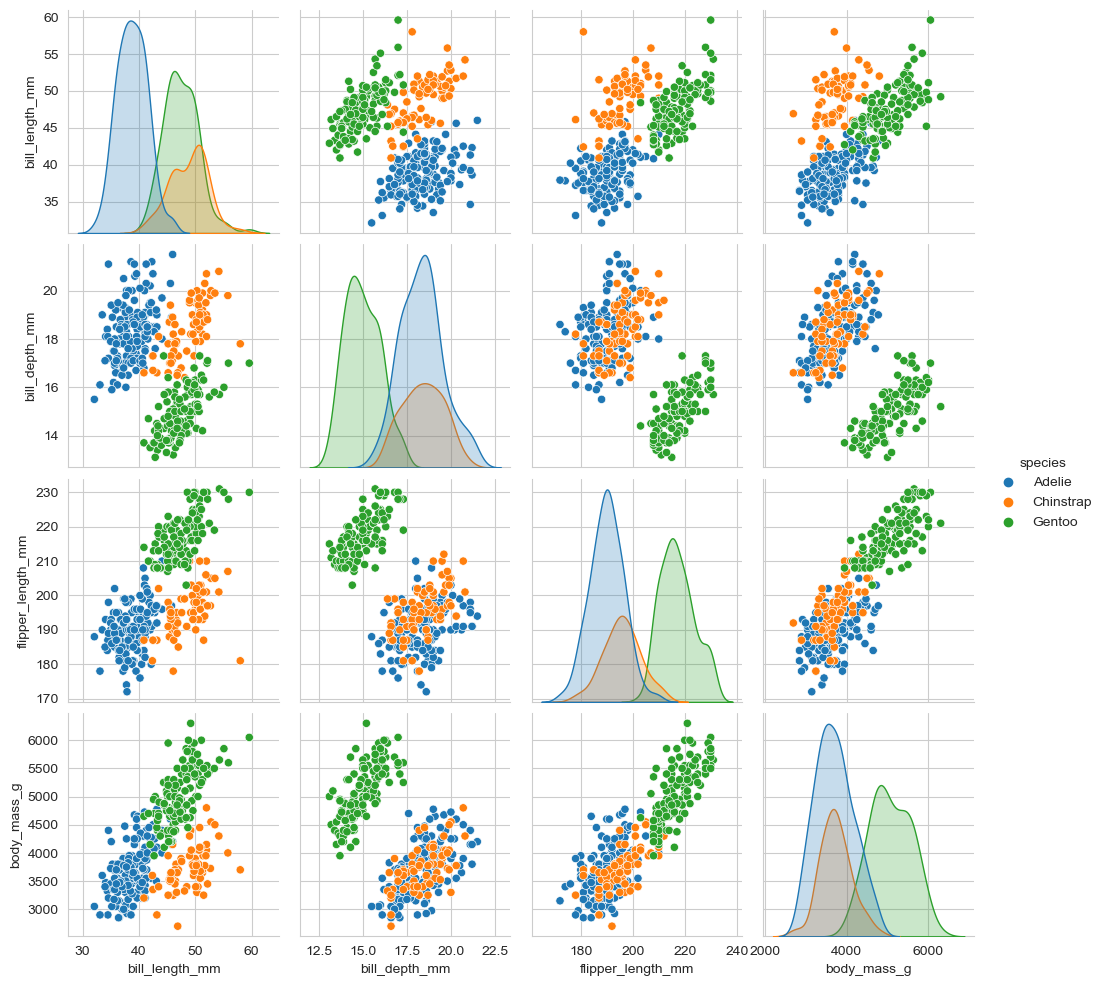

In [56]:
sns.pairplot(penguins, hue="species")
plt.show()

Można też wykorzystać `pd.plotting.scatter_matrix`.

Możemy zwizualizować zależność każdej zmiennej od innej zmiennej. Oczywiście można dojść do ciekawych wniosków, ale wykresów powstanie dużo, poprzez co szybkie wyciąganie dobrych wnisków staje się dość karkołomne.

Analiza wielowymiarowa jest potrzebna, istotna. Ale może dopiero na dalszym etapie?
Co na co można postawić na początku?

In [220]:
penguins = (penguins
            .astype({"species": "category", 
                "island": "category",
                "sex": "category"})
            .dropna()
           )

## Wykresy  wielowymiarowe

## Radial chart

[Krótko o radial charts](https://www.data-to-viz.com/caveat/spider.html)

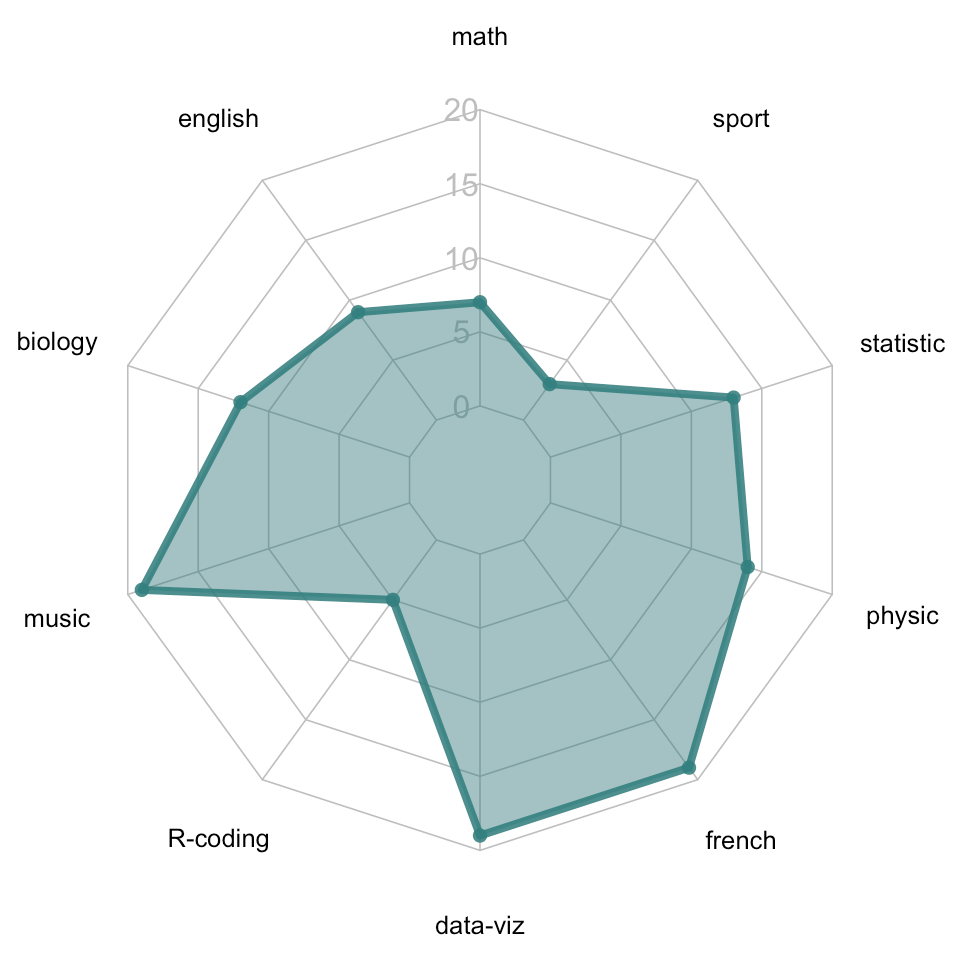

In [58]:
import plotly.graph_objects as go

categories = ["setosa", "versicolor", "virginica"]
directions = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
means = iris.groupby("species").mean()

In [59]:
means

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

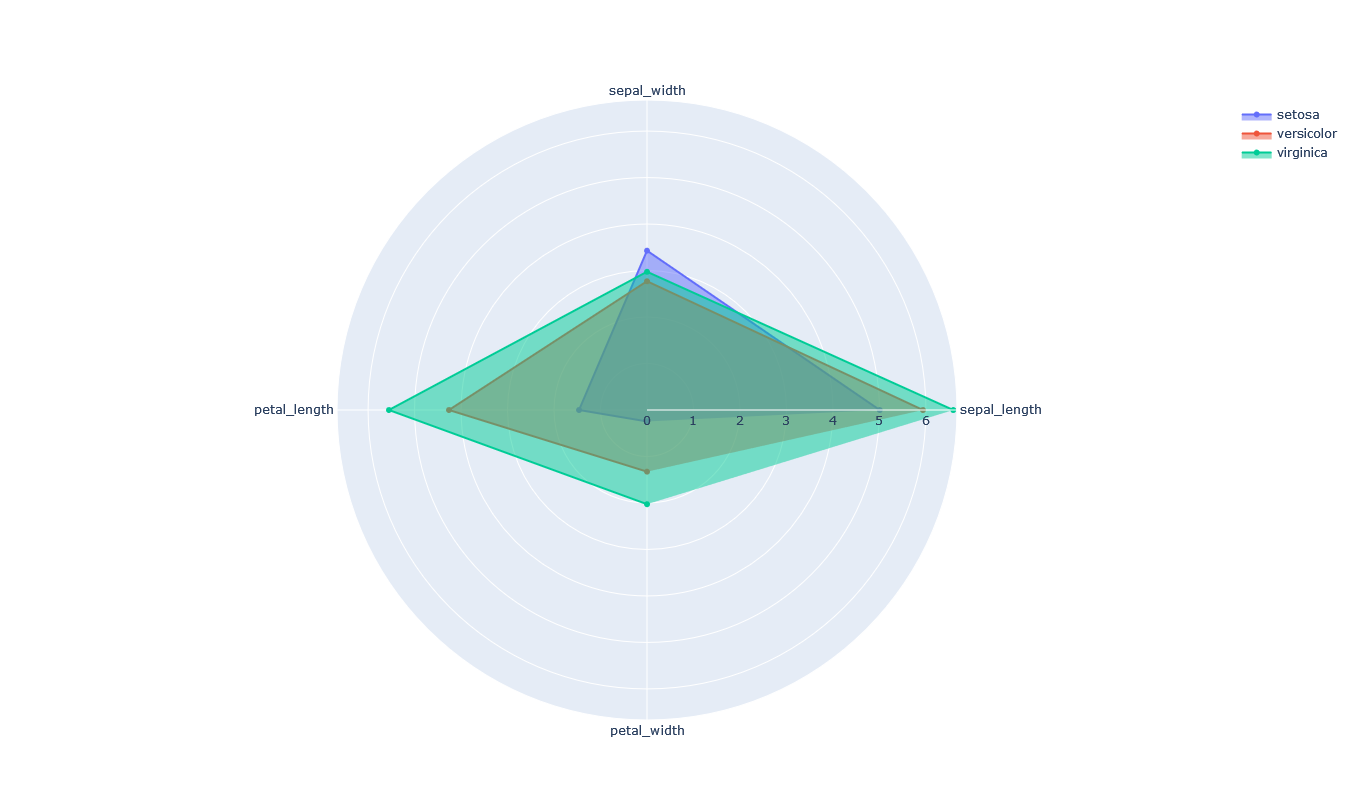

In [60]:
fig = go.Figure()

for (index, category) in enumerate(categories):
    fig.add_trace(go.Scatterpolar(
        r=means.iloc[index, :],
        theta=directions,
        fill="toself",
        name=category
))

fig.update_layout(
    width=600,
    height=800,
    polar=dict(
        radialaxis=dict(
            visible=True
    ))
)

fig.show()

### Parrallel coordinates

Każda obserwacja zostaje przedstawiona jako pewna krzywa, która przechodzi przez kolejne ...

In [192]:
import hiplot as hip

In [193]:
penguins_data = penguins.to_dict(orient='records')

In [195]:
hip.Experiment.from_iterable(penguins_data).display()

<IPython.core.display.Javascript object>

In [200]:
artificial_data = np.random.randn(200, 20)
category = np.random.randint(0, 3, 200).reshape(-1, 1)
data = np.hstack([artificial_data, category])

In [203]:
hip.Experiment.from_iterable(pd.DataFrame(data).to_dict(orient="records")).display()

<IPython.core.display.Javascript object>

In [64]:
penguins.to_csv("penguins.csv")

Można też wykorzystać `pandasa`, ale jest problem ...

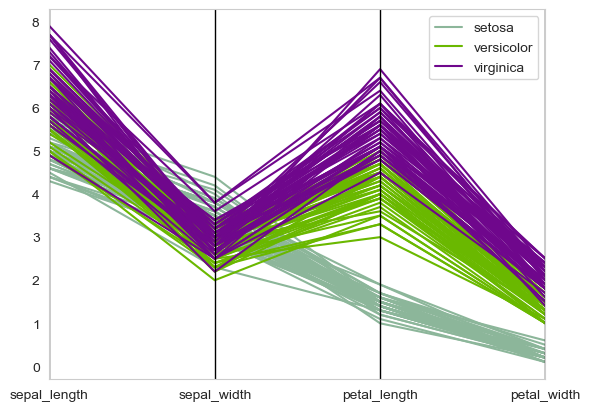

In [65]:
parallel_coordinates(iris, 'species')
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a numpy.float64

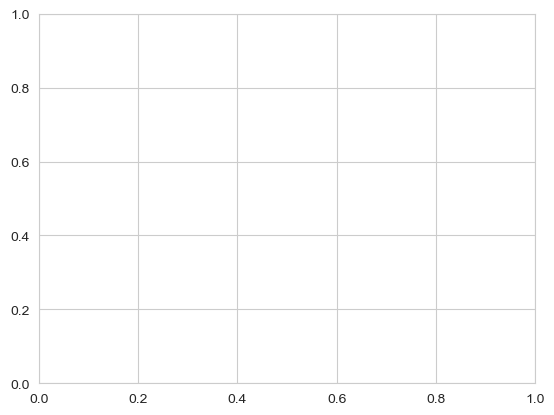

In [66]:
parallel_coordinates(penguins, 'species')

### Andrews curves

Niech $\mathbf{x} = \left(x_1,\,x_2,\,\ldots,\,x_n\right)$ będzie jedną obserwacją z $X$.
Wtedy krzywa Andrewsa wyraża się wzorem:

$$
f(t) = \frac{x_1}{\sqrt{2}} + x_2\sin(t) + x_3\cos(t) + x_4\sin(2t) + x_5\cos(2t) + \ldots,
$$

gdzie $t\in\left[-\pi,\,\pi\right]$.

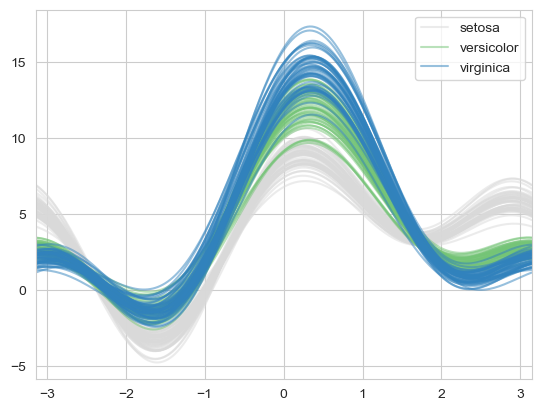

In [67]:
andrews_curves(iris, 'species', alpha=0.5, colormap=matplotlib.cm.tab20c_r)
sns.set_style("darkgrid")
plt.grid()
plt.show()

### Chernoff faces

In [68]:
import matplotlib.cm

In [69]:
usa_arrests_faces = variables_rescale(usa_arrests)

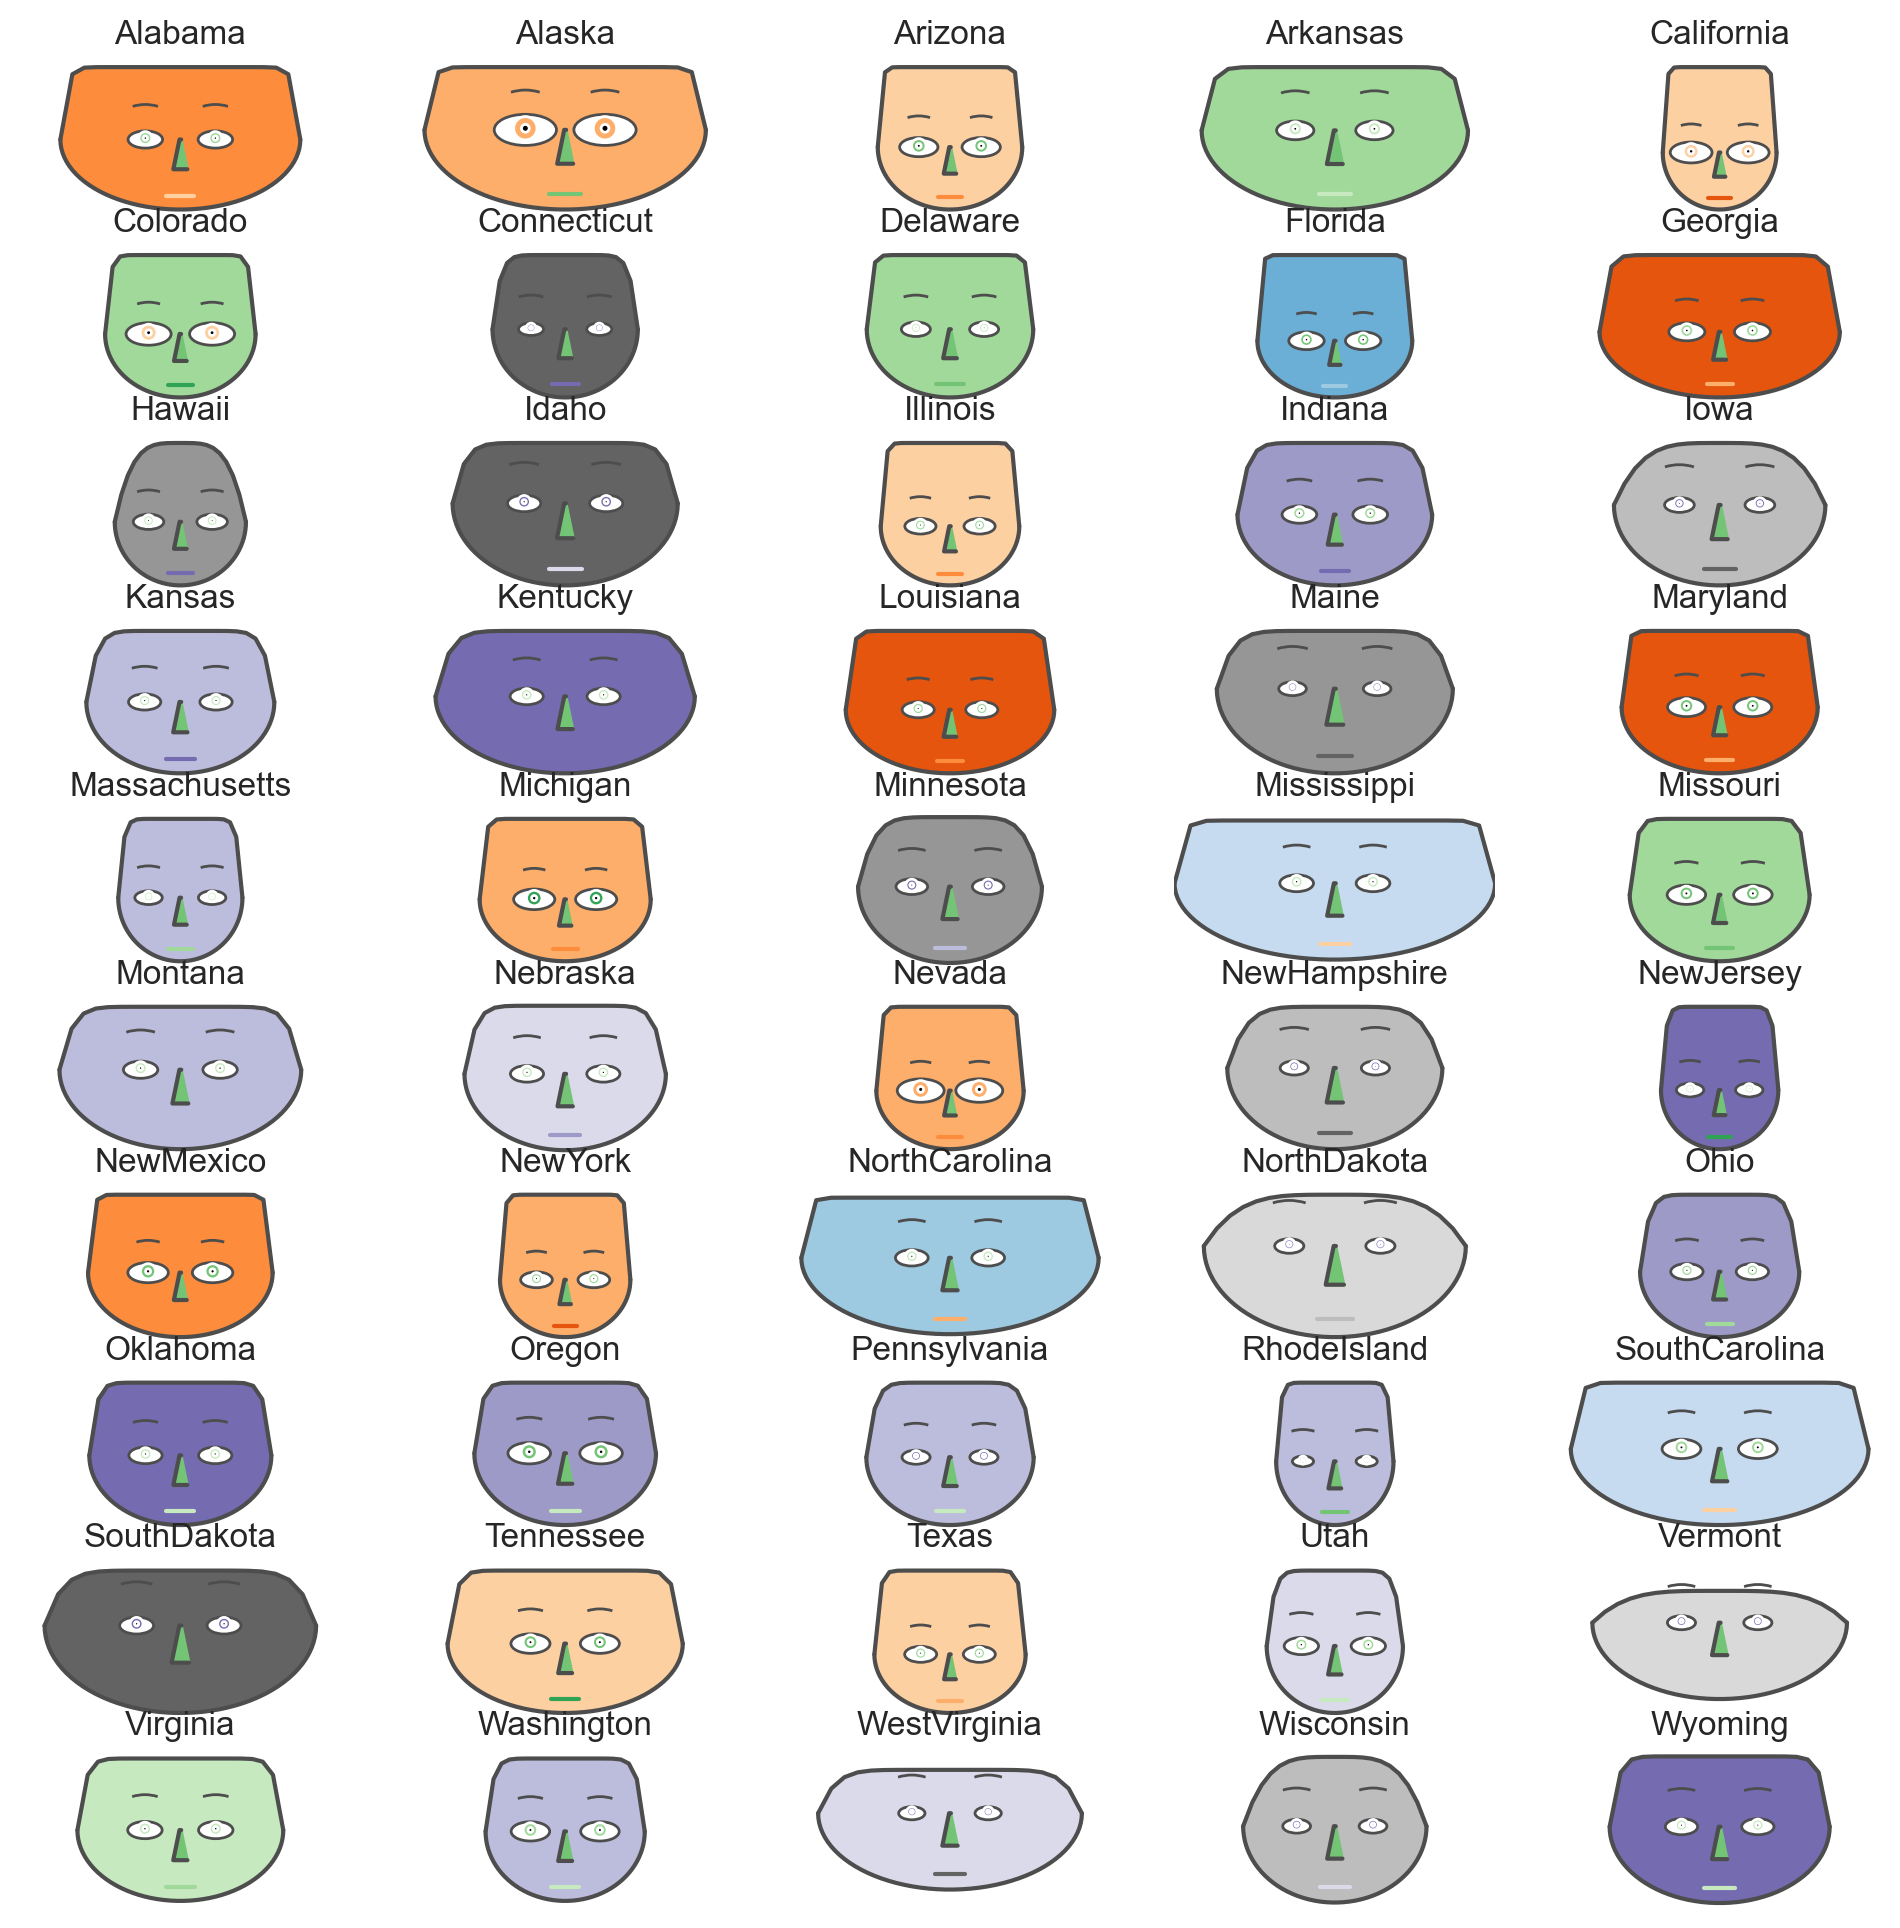

In [72]:
fig = chernoff_face(data=usa_arrests_faces,
                    n_columns=5,
                    long_face=False,
                    color_mapper=matplotlib.cm.tab20c_r,
                    figsize=(12, 12), dpi=200);

In [73]:
fig.tight_layout()
plt.show()

## Dimensionality reduction

Dużo, dużo metod, np:
* PCA (różne warianty),
* MDS, 
* T-SNE,
* UMAP,
* &hellip;

In [204]:
# our data
import plotly.express as px
from sklearn.datasets import make_s_curve, make_swiss_roll

In [205]:
s_curve_x, s_curve_y = make_s_curve(500, noise=0.15)
swiss_x, swiss_y = make_swiss_roll(500, noise=0.15)

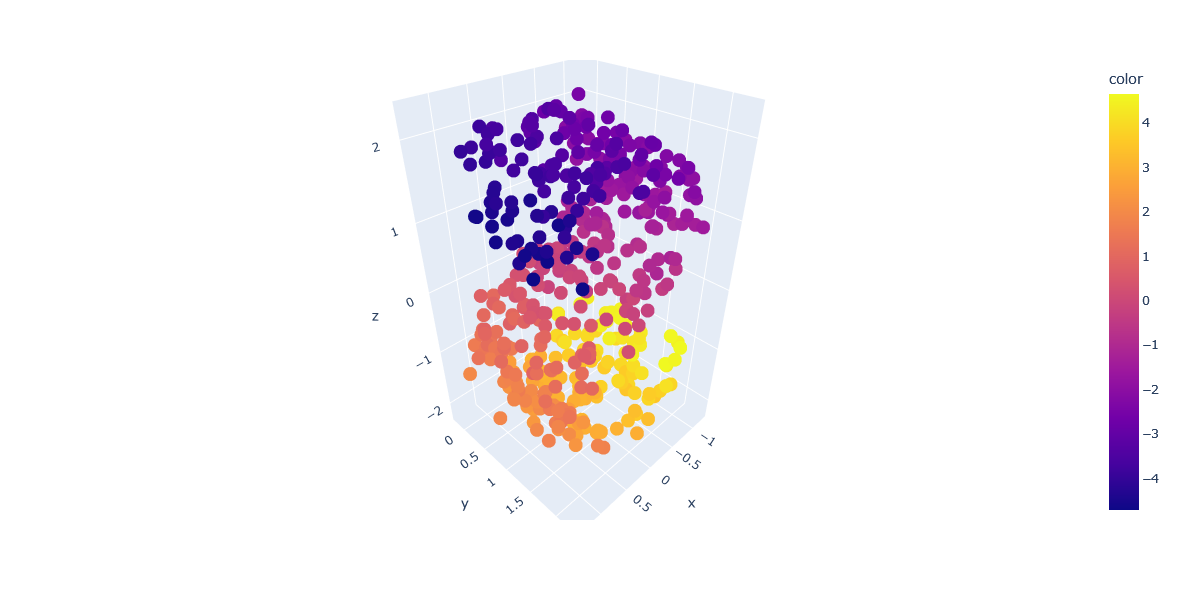

In [206]:
fig = px.scatter_3d(x=s_curve_x[:, 0],
                    y=s_curve_x[:, 1],
                    z=s_curve_x[:, 2],
                    color=s_curve_y)

fig.update_layout(width=1000, height=600)
fig.show()

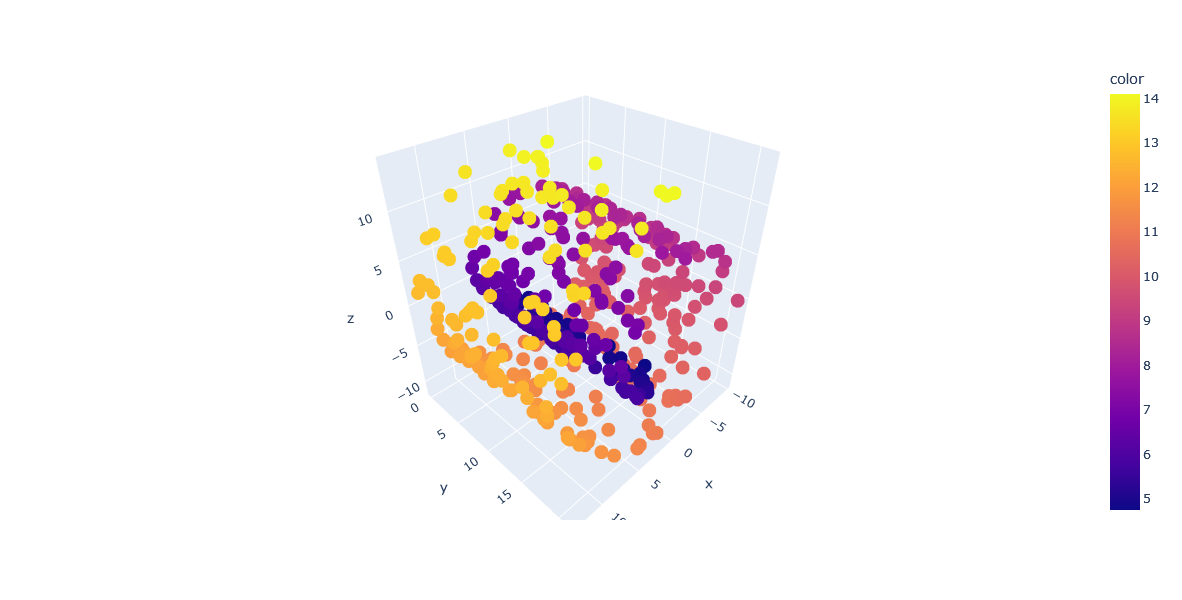

In [207]:
fig = px.scatter_3d(x=swiss_x[:, 0],
                    y=swiss_x[:, 1],
                    z=swiss_x[:, 2],
                    color=swiss_y)

fig.update_layout(width=1000, height=600)
fig.show()

In [221]:
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA

In [222]:
def transform(algo, data, n_components):
    model = algo(n_components=n_components)
    return model.fit_transform(data)

In [223]:
models = [MDS, PCA, TSNE]

C:\Users\Manik\devtools\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Manik\devtools\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

C:\Users\Manik\devtools\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Manik\devtools\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



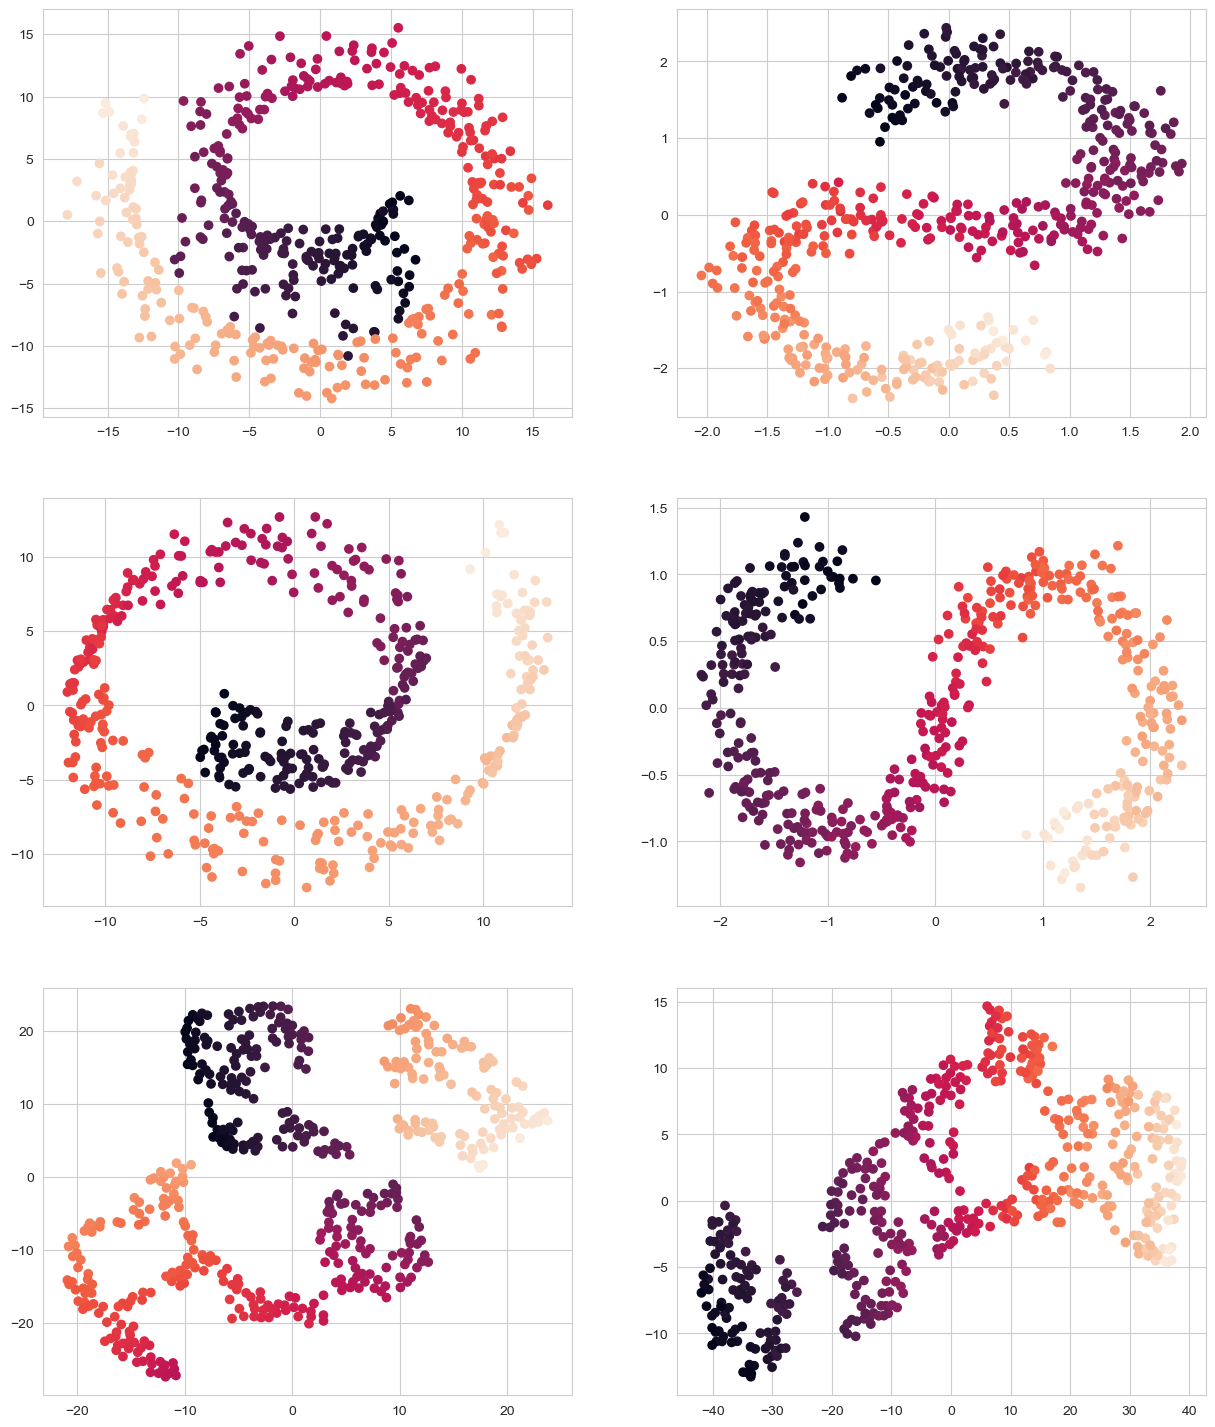

In [224]:
fig, ax = plt.subplots(3, 2, figsize=(15, 18))

for index, model in enumerate(models):
    data_1 = transform(model, swiss_x, 2)
    data_2 = transform(model, s_curve_x, 2)
    plt.subplot(3, 2, 2*(index+1) - 1)
    plt.scatter(data_1[:, 0], data_1[:, 1], c=swiss_y)
    plt.subplot(3, 2, 2*(index+1))
    plt.scatter(data_2[:, 0], data_2[:, 1], c=s_curve_y)
plt.show()   

In [225]:
iris_x = iris.iloc[:, :-1]
iris_y = iris.species

In [226]:
iris_2d = pd.DataFrame(transform(PCA, iris_x, 2)).rename({0: "x", 1: "y"}, axis=1).assign(species=iris_y)
iris_3d = pd.DataFrame(transform(PCA, iris_x, 3)).rename({0: "x", 1: "y", 2: "z"}, axis=1).assign(species=iris_y)

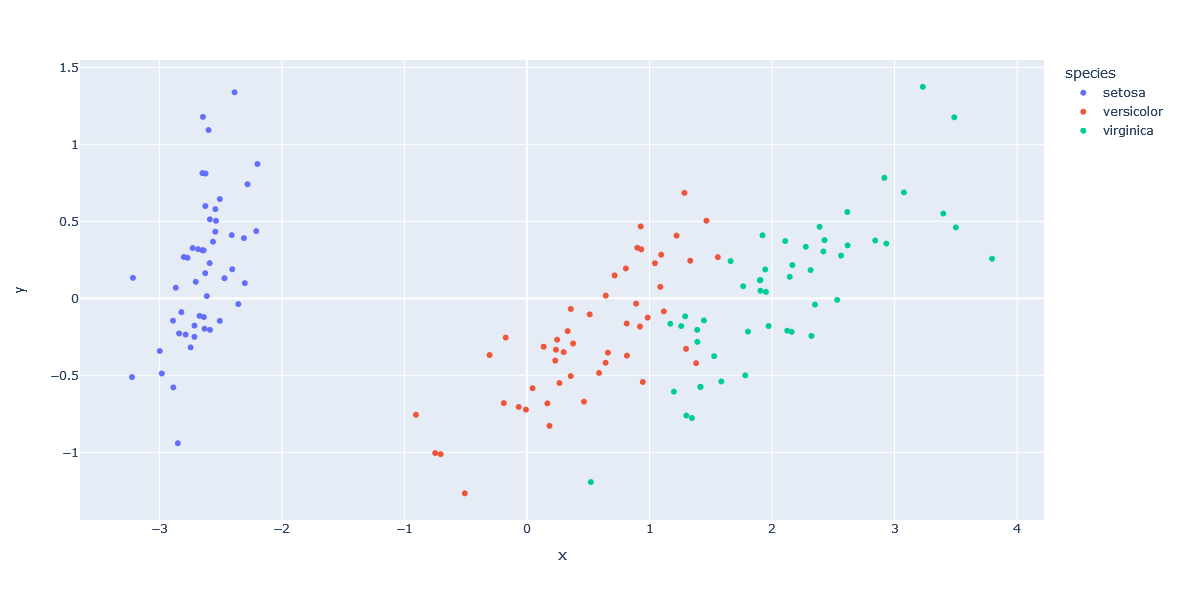

In [227]:
fig = px.scatter(iris_2d, x="x", y="y", color="species")
fig.update_layout(width=800, height=600)
fig.show()

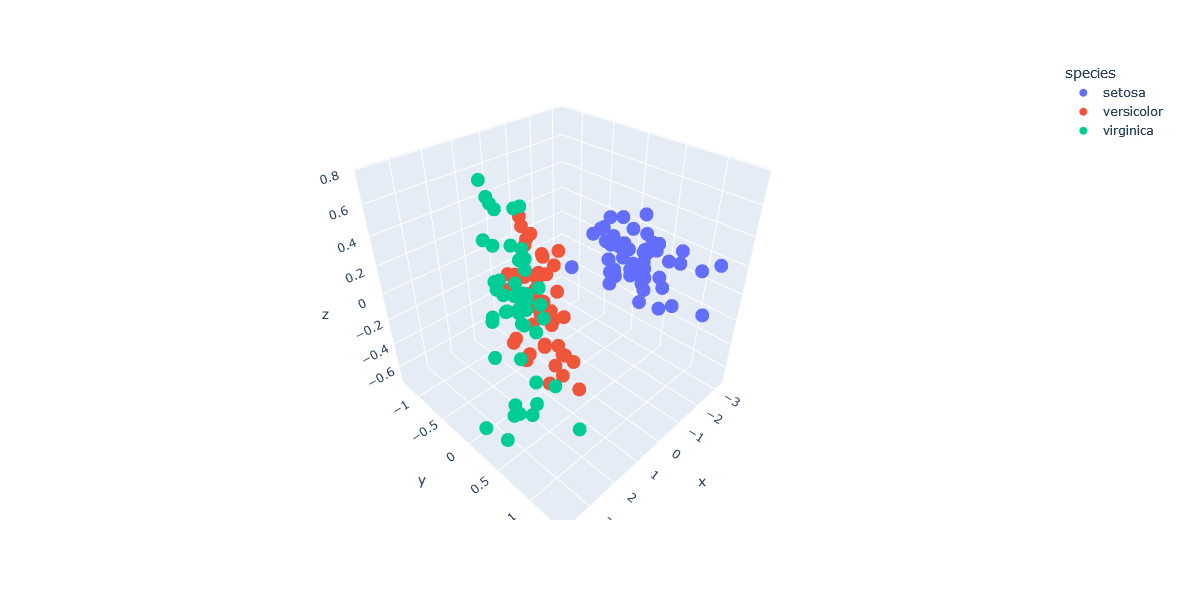

In [228]:
fig = px.scatter_3d(iris_3d, x="x", y="y", z="z", color="species")
fig.update_layout(width=800, height=600)
fig.show()

In [229]:
{i: "object" for i in ["island", "sex"]}

{'island': 'object', 'sex': 'object'}

In [236]:
penguins_y = penguins.species
penguins_x = penguins.drop("species", axis=1).astype({i: "object" for i in ["island", "sex"]})

In [237]:
gower_distance = gower.gower_matrix(penguins_x)

In [239]:
penguins_2d = MDS(n_components=2, dissimilarity="precomputed").fit_transform(gower_distance)
penguins_3d = (
    pd.DataFrame(MDS(n_components=3, dissimilarity="precomputed")
                 .fit_transform(gower_distance))
    .rename({0: "x", 1: "y", 2: "z"}, axis=1)
    .assign(species=penguins_y, 
            island=penguins.island)
)

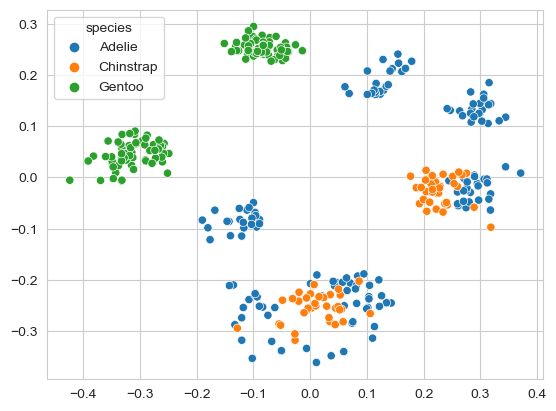

In [240]:
sns.scatterplot(x=penguins_2d[:, 0], y=penguins_2d[:, 1], hue=penguins_y)
plt.show()

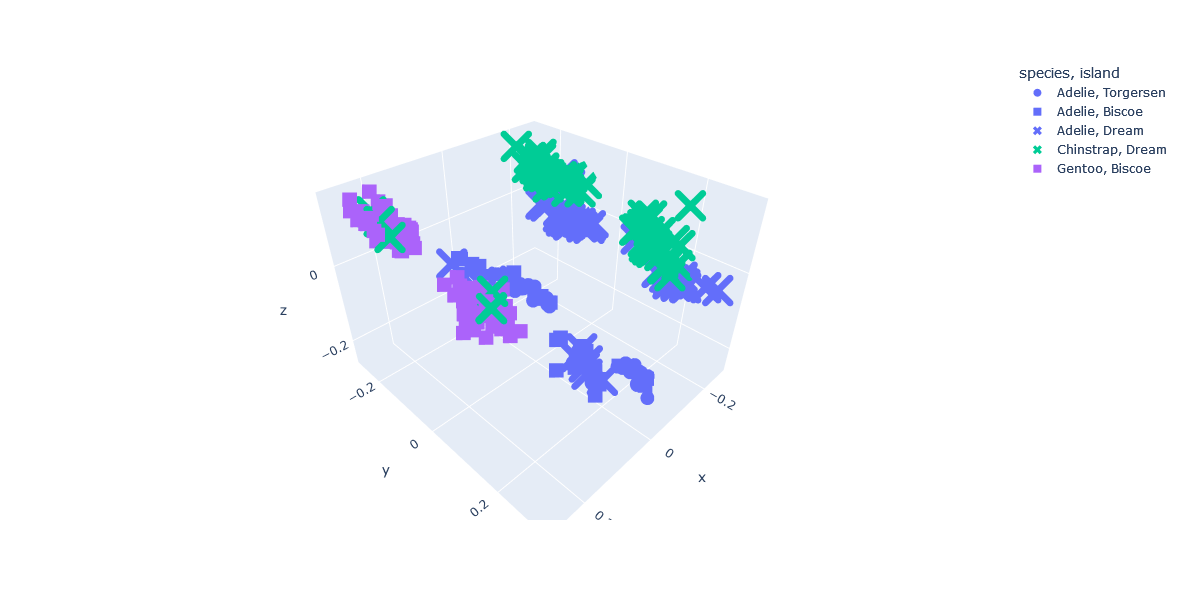

In [247]:
fig = px.scatter_3d(penguins_3d, x="x", y="y", z="z", color="species", symbol="island", size_max=1)
fig.update_layout(width=800, height=600)
fig.show()

In [186]:
mds = MDS(n_components=3, dissimilarity="precomputed")
mds.fit(gower_distance)


MDS(dissimilarity='precomputed', n_components=3)

In [187]:
mds.stress_

68.89073052747605

## Autoencoder

In [ ]:
import torch
from torch import nn, optim

In [107]:
device = "cpu"

In [220]:
class Autoencoder(nn.Module):
   
    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 128),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, enc_shape),
        )
        
        self.decode = nn.Sequential(
            nn.BatchNorm1d(enc_shape),
            nn.Linear(enc_shape, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(128, in_shape)
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x
    
encoder = Autoencoder(in_shape=3, enc_shape=2).double().to(device)
error = nn.MSELoss()
optimizer = optim.Adam(encoder.parameters())

In [221]:
def train(model, error, optimizer, n_epochs, x):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        
        if epoch % 50 == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')

In [223]:
s_curve_x, s_curve_y = make_s_curve(500, noise=0.15)
swiss_x, swiss_y = make_swiss_roll(500, noise=0.15)

In [227]:
x = torch.from_numpy(s_curve_x).to(device)

In [228]:
train(encoder, error, optimizer, 5000, x)

epoch 50 	 Loss: 0.1917
epoch 100 	 Loss: 0.1471
epoch 150 	 Loss: 0.1213
epoch 200 	 Loss: 0.1129
epoch 250 	 Loss: 0.1039
epoch 300 	 Loss: 0.09502
epoch 350 	 Loss: 0.08734
epoch 400 	 Loss: 0.07991
epoch 450 	 Loss: 0.07712
epoch 500 	 Loss: 0.07595
epoch 550 	 Loss: 0.06647
epoch 600 	 Loss: 0.07235
epoch 650 	 Loss: 0.06374
epoch 700 	 Loss: 0.06148
epoch 750 	 Loss: 0.06018
epoch 800 	 Loss: 0.06075
epoch 850 	 Loss: 0.05897
epoch 900 	 Loss: 0.05438
epoch 950 	 Loss: 0.05651
epoch 1000 	 Loss: 0.05739
epoch 1050 	 Loss: 0.04975
epoch 1100 	 Loss: 0.04914
epoch 1150 	 Loss: 0.04868
epoch 1200 	 Loss: 0.05119
epoch 1250 	 Loss: 0.05162
epoch 1300 	 Loss: 0.04552
epoch 1350 	 Loss: 0.04719
epoch 1400 	 Loss: 0.0459
epoch 1450 	 Loss: 0.04685
epoch 1500 	 Loss: 0.04402
epoch 1550 	 Loss: 0.04695
epoch 1600 	 Loss: 0.04571
epoch 1650 	 Loss: 0.04323
epoch 1700 	 Loss: 0.04267
epoch 1750 	 Loss: 0.04463
epoch 1800 	 Loss: 0.04568
epoch 1850 	 Loss: 0.04418
epoch 1900 	 Loss: 0.04265


In [229]:
with torch.no_grad():
    encoded = encoder.encode(x)
    decoded = encoder.decode(encoded)
    mse = error(decoded, x).item()
    enc = encoded.cpu().detach().numpy()
    dec = decoded.cpu().detach().numpy()

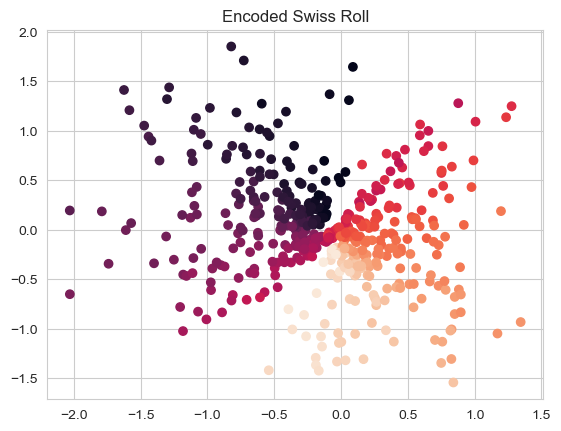

In [230]:
plt.scatter(enc[:, 0], enc[:, 1], c=s_curve_y)
plt.title('Encoded Swiss Roll')
plt.show()

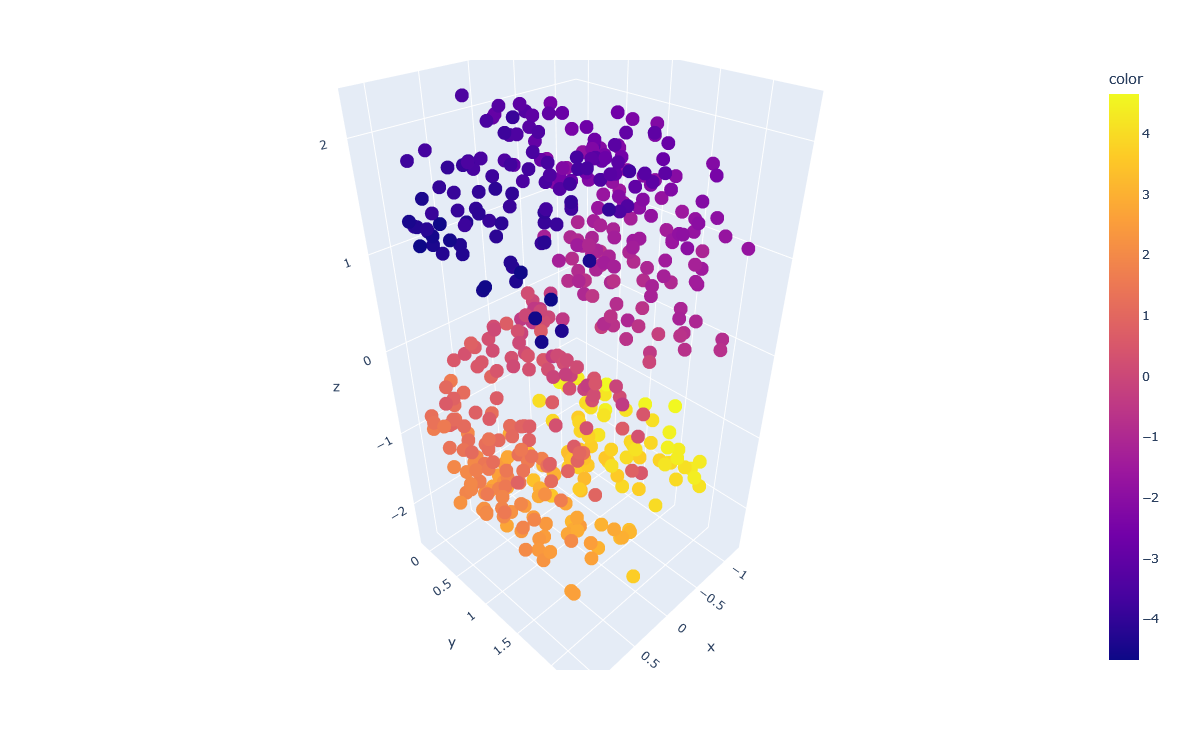

In [231]:
fig = px.scatter_3d(x=dec[:, 0], y=dec[:, 1], z=dec[:, 2], color=s_curve_y)
fig.update_layout(width=1000, height=750)
fig.show()

In [236]:
encoder_2 = Autoencoder(in_shape=3, enc_shape=2).double().to(device)
error_2 = nn.MSELoss()
optimizer_2 = optim.Adam(encoder_2.parameters())

In [237]:
scaler = MinMaxScaler()
scaler.fit(swiss_x)
transformed_swiss = scaler.transform(swiss_x)

In [238]:
x_2 = torch.from_numpy(transformed_swiss).to(device)

In [239]:
train(encoder_2, error_2, optimizer_2, 5000, x_2)

epoch 50 	 Loss: 0.04528
epoch 100 	 Loss: 0.03614
epoch 150 	 Loss: 0.03281
epoch 200 	 Loss: 0.02802
epoch 250 	 Loss: 0.02188
epoch 300 	 Loss: 0.01888
epoch 350 	 Loss: 0.01587
epoch 400 	 Loss: 0.0162
epoch 450 	 Loss: 0.01285
epoch 500 	 Loss: 0.01348
epoch 550 	 Loss: 0.01317
epoch 600 	 Loss: 0.01266
epoch 650 	 Loss: 0.01055
epoch 700 	 Loss: 0.01094
epoch 750 	 Loss: 0.0109
epoch 800 	 Loss: 0.01006
epoch 850 	 Loss: 0.009776
epoch 900 	 Loss: 0.009705
epoch 950 	 Loss: 0.009473
epoch 1000 	 Loss: 0.009561
epoch 1050 	 Loss: 0.008973
epoch 1100 	 Loss: 0.008421
epoch 1150 	 Loss: 0.008885
epoch 1200 	 Loss: 0.008432
epoch 1250 	 Loss: 0.008345
epoch 1300 	 Loss: 0.008062
epoch 1350 	 Loss: 0.008394
epoch 1400 	 Loss: 0.007722
epoch 1450 	 Loss: 0.008476
epoch 1500 	 Loss: 0.008213
epoch 1550 	 Loss: 0.007651
epoch 1600 	 Loss: 0.007692
epoch 1650 	 Loss: 0.00738
epoch 1700 	 Loss: 0.007722
epoch 1750 	 Loss: 0.007386
epoch 1800 	 Loss: 0.007666
epoch 1850 	 Loss: 0.007263
epo

In [248]:
with torch.no_grad():
    encoded_2 = encoder_2.encode(x_2)
    decoded_2 = encoder_2.decode(encoded_2)
    mse_2 = error_2(decoded_2, x_2).item()
    enc_2 = encoded_2.cpu().detach().numpy()
    dec_2 = decoded_2.cpu().detach().numpy()

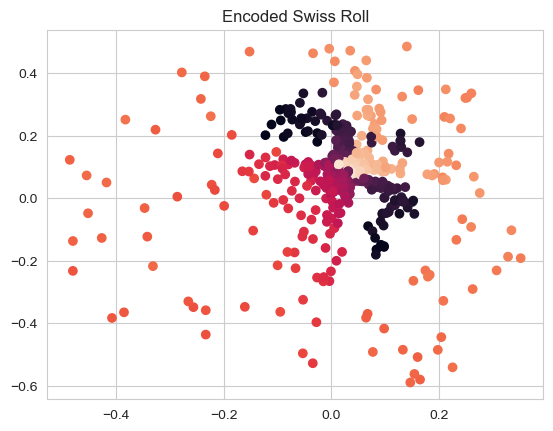

In [249]:
plt.scatter(enc_2[:, 0], enc_2[:, 1], c=swiss_y)
plt.title('Encoded Swiss Roll')
plt.show()

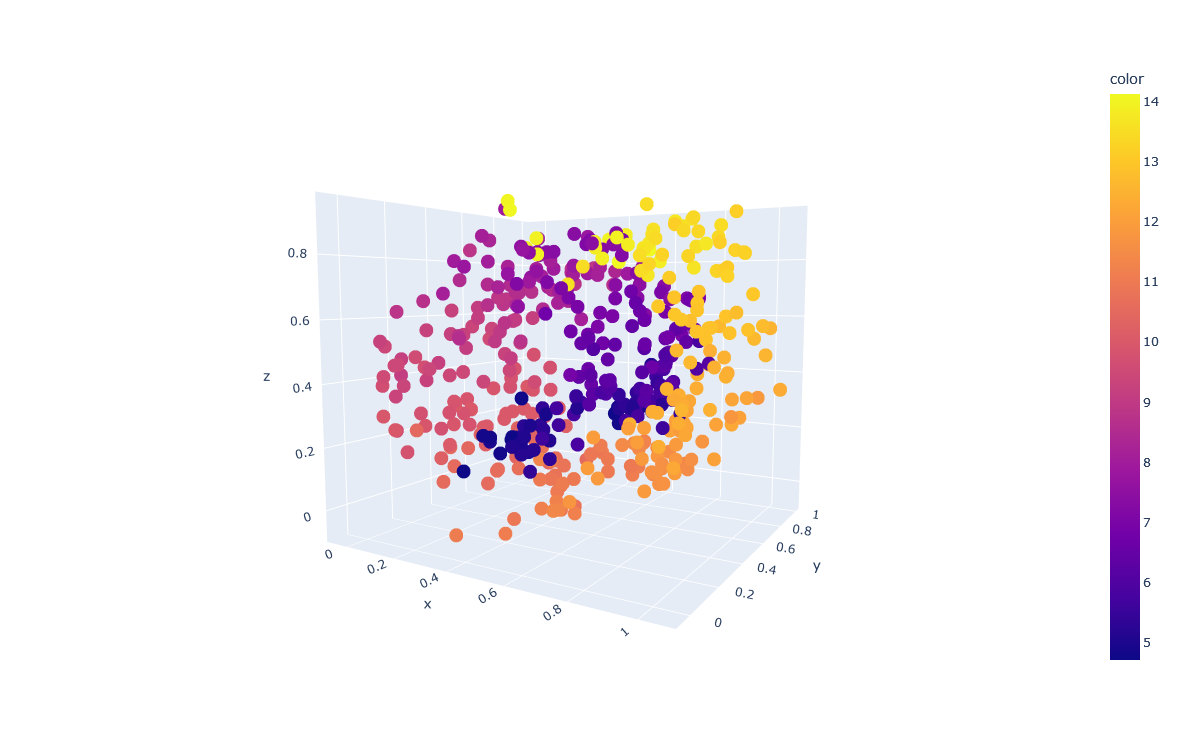

In [250]:
fig = px.scatter_3d(x=dec_2[:, 0], y=dec_2[:, 1], z=dec_2[:, 2], color=swiss_y)
fig.update_layout(width=1000, height=750)
fig.show()

In [251]:
np.sqrt(mse_2)

0.07270953821217886